In [ ]:
# !pip install mediapipe

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

## KEYPOINT EXTRACTION

In [2]:
mp

<module 'mediapipe' from 'H:\\PYTHON\\PYTHON SYSTEM FILES\\Lib\\site-packages\\mediapipe\\__init__.py'>

In [3]:
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

In [4]:
mp_holistic

<module 'mediapipe.python.solutions.holistic' from 'H:\\PYTHON\\PYTHON SYSTEM FILES\\Lib\\site-packages\\mediapipe\\python\\solutions\\holistic.py'>

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False                  
    results = model.process(image)                
    image.flags.writeable = True                   
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) 
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS) # face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 

    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
   
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
      
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
cap = cv2.VideoCapture("J:/AUTISM DETECTION PROJECT/3DCNN/videos/fear/fear20.mp4")

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [10]:
# frame

In [11]:
# from PIL import Image
# import numpy as np

# # Open the image using Pillow (PIL)
# image_path = "20.jpg"
# image = Image.open(image_path)

# # Convert the image to a NumPy array
# image_array = np.array(image)

In [12]:
# image_array

In [13]:
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    image, results = mediapipe_detection(frame, holistic)

    draw_styled_landmarks(frame, results)

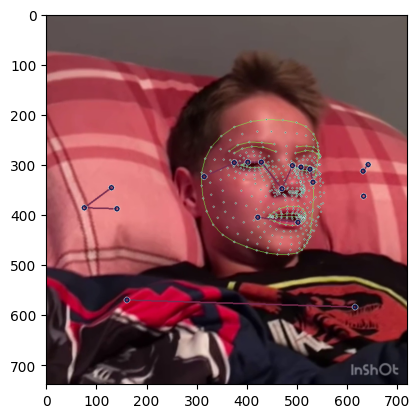

In [14]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [15]:
len(results.face_landmarks.landmark)

468

In [16]:
results.pose_landmarks.landmark

[x: 0.6538714
y: 0.4720751
z: -1.6284484
visibility: 0.9992755
, x: 0.6833113
y: 0.4098862
z: -1.4774656
visibility: 0.999253
, x: 0.7067708
y: 0.41458383
z: -1.4777265
visibility: 0.9990287
, x: 0.7313858
y: 0.41958904
z: -1.4780777
visibility: 0.9991203
, x: 0.5969684
y: 0.40055406
z: -1.5203131
visibility: 0.99925643
, x: 0.5588832
y: 0.40080655
z: -1.5194384
visibility: 0.9991755
, x: 0.5219446
y: 0.4023267
z: -1.5200379
visibility: 0.9993736
, x: 0.7394533
y: 0.45412266
z: -0.6195051
visibility: 0.9995466
, x: 0.43805575
y: 0.4403205
z: -0.77333444
visibility: 0.9997142
, x: 0.6977755
y: 0.56352115
z: -1.3122424
visibility: 0.999355
, x: 0.586344
y: 0.5495453
z: -1.3618919
visibility: 0.999358
, x: 0.856897
y: 0.79163295
z: -0.1557897
visibility: 0.984125
, x: 0.22438934
y: 0.7733591
z: -0.45798165
visibility: 0.98052245
, x: 1.354174
y: 0.8796799
z: -0.6367673
visibility: 0.7178158
, x: -0.066934764
y: 0.93166417
z: -1.2835796
visibility: 0.87125015
, x: 1.0053871
y: 0.54480946
z

In [17]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [18]:
pose

[array([ 0.65387142,  0.4720751 , -1.62844837,  0.99927551]),
 array([ 0.68331128,  0.40988621, -1.47746563,  0.99925297]),
 array([ 0.70677078,  0.41458383, -1.47772646,  0.99902868]),
 array([ 0.73138583,  0.41958904, -1.47807765,  0.9991203 ]),
 array([ 0.59696841,  0.40055406, -1.52031314,  0.99925643]),
 array([ 0.55888319,  0.40080655, -1.51943839,  0.99917549]),
 array([ 0.52194458,  0.4023267 , -1.52003789,  0.99937361]),
 array([ 0.73945332,  0.45412266, -0.61950511,  0.99954659]),
 array([ 0.43805575,  0.44032049, -0.77333444,  0.9997142 ]),
 array([ 0.69777548,  0.56352115, -1.31224239,  0.99935502]),
 array([ 0.586344  ,  0.54954529, -1.36189187,  0.999358  ]),
 array([ 0.856897  ,  0.79163295, -0.1557897 ,  0.98412502]),
 array([ 0.22438934,  0.77335912, -0.45798165,  0.98052245]),
 array([ 1.35417402,  0.87967992, -0.63676733,  0.71781582]),
 array([-0.06693476,  0.93166417, -1.28357959,  0.87125015]),
 array([ 1.00538707,  0.54480946, -0.83479434,  0.757406  ]),
 array([

In [19]:
#33 for pose
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
#468 for face
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
#21 for hand
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [20]:
len(face)

1404

In [21]:
lh,rh

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [22]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [23]:
face

array([ 0.68555963,  0.52090037, -0.05193463, ...,  0.74675614,
        0.40903342,  0.08246467])

In [24]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])


In [25]:
result_test = extract_keypoints(results)

In [26]:
result_test

array([ 0.65387142,  0.4720751 , -1.62844837, ...,  0.        ,
        0.        ,  0.        ])

In [27]:
468*3+33*4+21*3+21*3

1662

In [28]:
len(result_test)

1662

In [29]:
np.save('0', result_test)

In [30]:
np.load('0.npy')

array([ 0.65387142,  0.4720751 , -1.62844837, ...,  0.        ,
        0.        ,  0.        ])

## DATA ARRANGEMENT

In [31]:
# !pip install moviepy

In [32]:
DATA_PATH = os.path.join('data2') 

# Actions that we try to detect
actions = np.array(['happy','sad','anger','surprise','fear','neutral'])
actions.sort()

# 62 videos
no_sequences = 62

# 30 frames
sequence_length = 30

#start new folder after 30 frames for data prep
start_folder = 30

In [33]:
os.makedirs('data/', exist_ok=True)

# Create subdirectories for each action
for action in actions:
    action_directory = os.path.join('data', action)
    os.makedirs(action_directory, exist_ok=True)

In [34]:
# import cv2
# import os

# # Video file path
# video_path = 'J:/AUTISM DETECTION PROJECT/3DCNN/videos/neutral/neutral13.mp4'

# # Create a directory to save frames
# output_directory = 'data2/neutral'
# os.makedirs(output_directory, exist_ok=True)

# # Open the video file
# cap = cv2.VideoCapture(video_path)

# frame_count = 0
# folder_count = 55
# frame_per_folder = 30
# fps = int(cap.get(cv2.CAP_PROP_FPS))

# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:

#     while cap.isOpened():
#         ret, frame = cap.read()
        
#         if not ret:
#             break

#         image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#         draw_styled_landmarks(image, results)
    
        
#         if frame_count % frame_per_folder == 0:
#             current_folder = os.path.join(output_directory, f'{folder_count}')
#             os.makedirs(current_folder, exist_ok=True)
#             folder_count += 1

#         keypoints = extract_keypoints(results)
#         frame_name = os.path.join(current_folder, f'{frame_count % frame_per_folder}.npy')
        
#         np.save(frame_name, keypoints)
    
#         frame_count += 1
    
#         if frame_count >= frame_per_folder * folder_count:
#             break
    
#     # Release the video capture object
# cap.release()

# # Close all OpenCV windows (if any were opened)
# cv2.destroyAllWindows()


## Preprocess Data and Create Labels and Features

In [35]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [36]:
label_map = {label:num for num, label in enumerate(actions)}

In [37]:
label_map

{'anger': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4, 'surprise': 5}

In [38]:
DATA_PATH

'data2'

In [39]:
# import os

# # Define the base directory
# base_directory = 'data2'

# # Iterate through the subdirectories in the base directory
# for root, dirs, files in os.walk(base_directory):
#     for subdir in dirs:
#         # Create the full path to the subdirectory
#         subdir_path = os.path.join(root, subdir)
#         # Use os.listdir to get the list of files in the subdirectory and count them
#         file_count = len(os.listdir(subdir_path))
#         if(file_count > 30):
#             print(f"Number of files in '{subdir_path}': {file_count}")


In [40]:
# import os

# # Define the path to the main directory containing the emotion categories (e.g., 'happy', 'sad', etc.)
# main_dir = 'data2/'

# # Loop through the emotion categories
# for emotion_category in os.listdir(main_dir):
#     category_path = os.path.join(main_dir, emotion_category)
    
#     # Check if it's a directory
#     if os.path.isdir(category_path):
#         # Get a list of subdirectories
#         subdirectories = os.listdir(category_path)
        
#         # Sort the subdirectories numerically
#         subdirectories.sort(key=lambda x: int(x))
        
#         # Rename the subdirectories from '1' to 'n'
#         for i, subdirectory in enumerate(subdirectories, start=1):
#             old_subdirectory_path = os.path.join(category_path, subdirectory)
#             new_subdirectory_path = os.path.join(category_path, str(i))
#             os.rename(old_subdirectory_path, new_subdirectory_path)
#             # print(old_subdirectory_path,new_subdirectory_path)


In [41]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [42]:
np.array(sequences).shape

(372, 30, 1662)

In [43]:
np.array(labels).shape

(372,)

In [44]:
X = np.array(sequences)

In [45]:
X.shape

(372, 30, 1662)

In [46]:
y = to_categorical(labels).astype(int)

In [47]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1]])

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [49]:
y_test.shape

(19, 6)

In [50]:
emotion_labels_train, emotion_labels_test=y_train, y_test

## Build Network

In [51]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM, Dense,Input
from tensorflow.keras.callbacks import TensorBoard

In [52]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [53]:
import tensorflow as tf

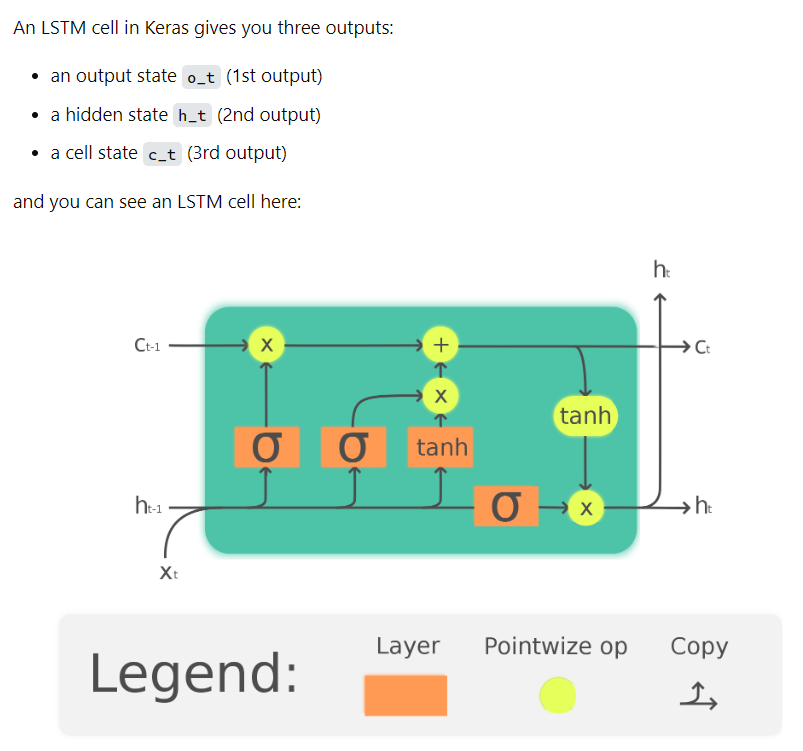

https://www.kaggle.com/code/kmkarakaya/lstm-output-types-return-sequences-state

In [54]:
class Attention(tf.keras.layers.Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        super(Attention, self).build(input_shape)

    def call(self, q, k, v):
        # Calculate attention scores using scalar dot product
        attention_scores = tf.matmul(q, k, transpose_b=True)
        attention_scores = tf.nn.softmax(attention_scores, axis=-1)
        
        output = tf.matmul(attention_scores, v)
        return output, attention_scores

In [55]:
input_layer = Input(shape=(30, 1662))

# LSTM layer
lstm_layer = LSTM(64, return_sequences=True, activation='relu', return_state=True)
output, state_h, state_c = lstm_layer(input_layer)

# Attention layer
attention_layer = Attention()  # You might need to adjust this based on your Attention layer implementation.
output, attention_scores = attention_layer(output, output, output)

# Continue with the rest of your model architecture using 'output'
x = LSTM(128, return_sequences=True, activation='relu')(output)
x = LSTM(64, return_sequences=False, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
output_layer = Dense(actions.shape[0], activation='softmax')(x)

# Build the model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [56]:
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [57]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 30, 1662)]           0         []                            
                                                                                                  
 lstm (LSTM)                 [(None, 30, 64),             442112    ['input_1[0][0]']             
                              (None, 64),                                                         
                              (None, 64)]                                                         
                                                                                                  
 attention (Attention)       ((None, 30, 64),             0         ['lstm[0][0]',                
                              (None, 30, 30))                        'lstm[0][0]',            

In [61]:
history = model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
12/12 [==============================] - 9s 731ms/step - loss: 9.1042 - categorical_accuracy: 0.1416
Epoch 2/200
12/12 [==============================] - 7s 567ms/step - loss: 10.0334 - categorical_accuracy: 0.2125
Epoch 3/200
12/12 [==============================] - 2s 197ms/step - loss: 9.3035 - categorical_accuracy: 0.1530
Epoch 4/200
12/12 [==============================] - 2s 137ms/step - loss: 10.0023 - categorical_accuracy: 0.1445
Epoch 5/200
12/12 [==============================] - 2s 133ms/step - loss: 6.8828 - categorical_accuracy: 0.1501
Epoch 6/200
12/12 [==============================] - 2s 131ms/step - loss: 14.0308 - categorical_accuracy: 0.1558
Epoch 7/200
12/12 [==============================] - 2s 137ms/step - loss: 14.5716 - categorical_accuracy: 0.1700
Epoch 8/200
12/12 [==============================] - 2s 135ms/step - loss: 17.5660 - categorical_accuracy: 0.1586
Epoch 9/200
12/12 [==============================] - 2s 135ms/step - loss: 10.4314 - catego

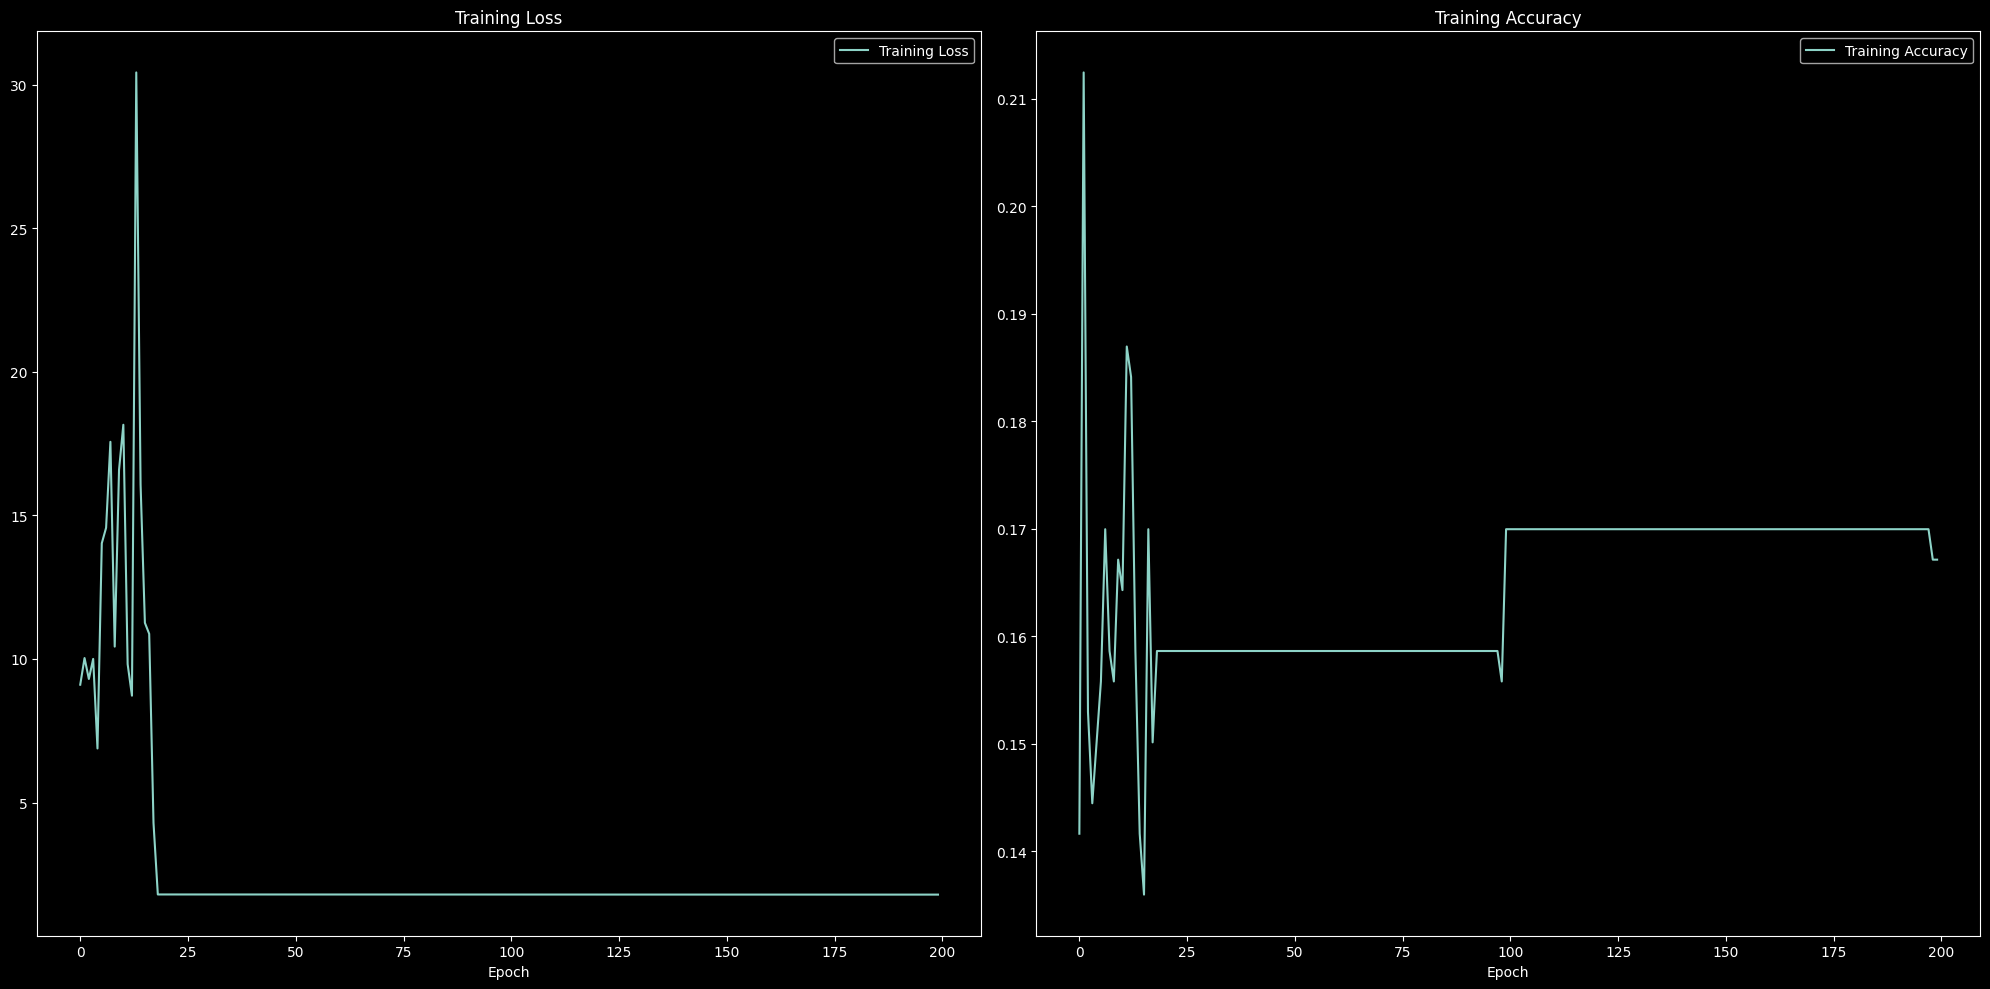

In [62]:
plt.style.use('dark_background')

# Plot loss and accuracy graphs
plt.figure(figsize=(20, 10))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['categorical_accuracy'], label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

In [63]:
attention_scores

<KerasTensor: shape=(None, 30, 30) dtype=float32 (created by layer 'attention')>

In [64]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
print(accuracy_score(ytrue, yhat))

1/1 [==============================] - 1s 695ms/step
0.15789473684210525


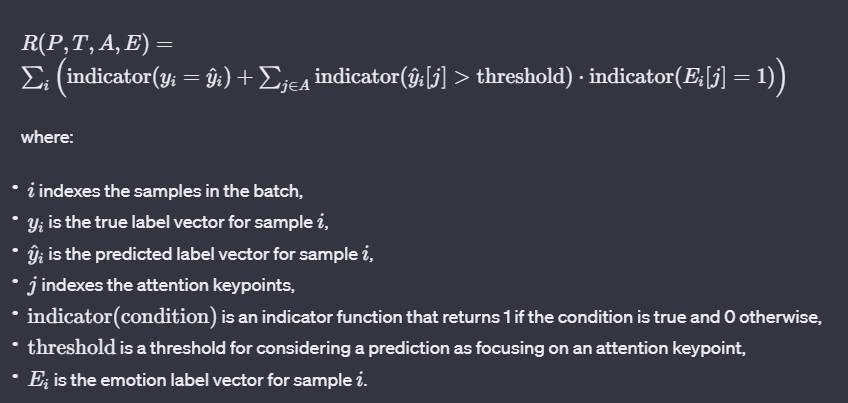

In [65]:
X_train.shape,y_train.shape[0]

((353, 30, 1662), 353)

In [66]:
model

In [67]:
for i in range(y_train.shape[0]):
    X_batch = np.expand_dims(X_train[i], axis=0)
    print(i,model(X_batch))
# print(y_batch)

0 tf.Tensor([[0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]], shape=(1, 6), dtype=float32)
1 tf.Tensor([[0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]], shape=(1, 6), dtype=float32)
2 tf.Tensor([[0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]], shape=(1, 6), dtype=float32)
3 tf.Tensor([[0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]], shape=(1, 6), dtype=float32)
4 tf.Tensor([[0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]], shape=(1, 6), dtype=float32)
5 tf.Tensor([[0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]], shape=(1, 6), dtype=float32)
6 tf.Tensor([[0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]], shape=(1, 6), dtype=float32)
7 tf.Tensor([[0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]], shape=(1, 6), dtype=float32)
8 tf.Tensor([[0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]], shape=(1, 6), dtype=f

In [68]:
X_batch = np.expand_dims(X_train[i], axis=0)
print(model(X_batch))

tf.Tensor([[0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]], shape=(1, 6), dtype=float32)


In [69]:
model.predict(X_train)

12/12 [==============================] - 1s 40ms/step


array([[0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       ...,
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628]], dtype=float32)

In [70]:
# predictions

In [71]:
num_epochs = 5
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
threshold_value = 0.5
total_iterations = 0

In [72]:
import numpy as np
import tensorflow as tf

def calculate_reward(predictions, true_labels):
    rewards = []

    for i in range(len(predictions)):
        pred = predictions[i]
        true_labels_np = true_labels[i]

        correct_prediction_reward = 1.0 if np.argmax(pred) == np.argmax(true_labels_np) else 0.0
        rewards.append(correct_prediction_reward)

    return rewards


In [73]:
for epoch in range(num_epochs):
    for i in range((y_train.shape[0])):
        X_batch, y_batch, emotion_labels_batch=X_train[i],y_train[i],emotion_labels_train[i]
        total_iterations += 1
        with tf.GradientTape() as tape:
            # Add batch dimension to X_batch
            X_batch = np.expand_dims(X_batch, axis=0)
            # print(X_batch)
            
            predictions = model(X_batch)
            
            # Add print statements for debugging
            # print("Predictions:", predictions)
            
            rewards = calculate_reward(predictions, y_batch)
            # print(predictions)
            loss = -tf.reduce_mean(tf.math.log(tf.reduce_sum(predictions * y_batch, axis=1)) * rewards)

            loss_value = loss.numpy()

            # Check if the loss is infinite
            if np.isinf(loss_value):
                continue
            elif np.isnan(loss_value):
                continue
            
            # Add print statements for debugging
            # print("Loss:", loss_value)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        if(total_iterations%100==0):
            print(f"Iteration {total_iterations}, Epoch {epoch + 1}, Loss: {loss.numpy()}")


Iteration 100, Epoch 1, Loss: 0.0
Iteration 200, Epoch 1, Loss: 0.0
Iteration 300, Epoch 1, Loss: 0.0
Iteration 400, Epoch 2, Loss: 0.0
Iteration 500, Epoch 2, Loss: 0.0
Iteration 600, Epoch 2, Loss: 0.0
Iteration 700, Epoch 2, Loss: 0.0
Iteration 800, Epoch 3, Loss: 0.0
Iteration 900, Epoch 3, Loss: 0.0
Iteration 1000, Epoch 3, Loss: 0.0
Iteration 1100, Epoch 4, Loss: 0.0
Iteration 1200, Epoch 4, Loss: 0.0
Iteration 1300, Epoch 4, Loss: 0.0
Iteration 1400, Epoch 4, Loss: 0.0
Iteration 1500, Epoch 5, Loss: 0.0
Iteration 1600, Epoch 5, Loss: 0.0
Iteration 1700, Epoch 5, Loss: 0.0


In [74]:
print("Hello")

Hello


In [75]:
X_train[0]

array([[ 0.66565168,  0.57830656, -1.34838986, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66623104,  0.57931364, -1.34288847, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66773045,  0.57952607, -1.32803321, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.67115724,  0.58145607, -1.35702419, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66975653,  0.5817672 , -1.33315277, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.66895604,  0.58174694, -1.38480449, ...,  0.        ,
         0.        ,  0.        ]])

In [76]:
# model.save_weights('modified_weights.h5')

In [77]:
res = model.predict(X_test)

1/1 [==============================] - 0s 185ms/step


In [78]:
X_test

array([[[ 4.65146065e-01,  6.79514706e-01, -1.14846623e+00, ...,
          3.52631748e-01,  2.75999308e-01,  6.48785233e-02],
        [ 4.64925945e-01,  6.79656327e-01, -1.16058552e+00, ...,
          3.51365775e-01,  3.10929000e-01,  1.07449129e-01],
        [ 4.64875758e-01,  6.80821538e-01, -1.19107938e+00, ...,
          3.51582289e-01,  3.07673603e-01,  7.23030344e-02],
        ...,
        [ 4.44229990e-01,  6.78261757e-01, -1.25385916e+00, ...,
          3.11300546e-01,  2.72562444e-01,  8.56809244e-02],
        [ 4.45960045e-01,  6.78895712e-01, -1.15854192e+00, ...,
          3.05151552e-01,  2.52692819e-01,  4.02569249e-02],
        [ 4.46478128e-01,  6.78753555e-01, -1.09247112e+00, ...,
          3.10708582e-01,  2.63939500e-01,  4.43716124e-02]],

       [[ 4.89899963e-01,  6.50399327e-01, -1.43113863e+00, ...,
          3.22755188e-01,  3.29631329e-01,  1.87327191e-02],
        [ 5.05796075e-01,  6.45718277e-01, -1.31178224e+00, ...,
          3.23822618e-01,  2.90093452e

In [79]:
res

array([[0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0.16720973, 0.1684702 , 0.16990247, 0.1593162 ,
        0.16872628],
       [0.1663751 , 0

In [80]:
actions[np.argmax(res[4])]

'neutral'

In [81]:
actions[np.argmax(y_test[4])]

'neutral'

In [82]:
model.save('action_with_reward.h5')

H:\PYTHON\PYTHON SYSTEM FILES\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [83]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [84]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 120ms/step


In [85]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [86]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[16,  0],
        [ 3,  0]],

       [[15,  0],
        [ 4,  0]],

       [[18,  0],
        [ 1,  0]],

       [[ 0, 16],
        [ 0,  3]],

       [[13,  0],
        [ 6,  0]],

       [[17,  0],
        [ 2,  0]]], dtype=int64)

In [87]:
accuracy_score(ytrue, yhat)

0.15789473684210525

In [88]:
for num, prob in enumerate(res):
    print(num,prob)

0 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
1 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
2 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
3 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
4 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
5 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
6 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
7 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
8 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
9 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
10 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
11 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
12 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
13 [0.1663751  0.16720973 0.1684702  0.16990247 0.1593162  0.16872628]
14 [0.1663751  0

In [89]:
from scipy import stats

In [90]:
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245), (255, 0, 0), (0, 255, 0), (0, 0, 255)]

def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame


In [91]:
# prob_viz(res[0], actions, image, colors)

In [92]:
# plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res[2], actions, image, colors))

In [ ]:
import tensorflow as tf

In [95]:
model = tf.keras.models.load_model("action_with_reward.h5")

TypeError: BaseDenseAttention.call() got an unexpected keyword argument 'k'

In [96]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture("happy19.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret or frame is None:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(res)
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(image)

In [ ]:
# history

In [ ]:
res

In [97]:
emo=['happy','sad','anger','surprise','fear','neutral']
emo.sort()
res
for i in range(len(actions)):
    print(emo[i],"---->",res[i])

anger ----> 0.1663751
fear ----> 0.16720973
happy ----> 0.1684702
neutral ----> 0.16990247
sad ----> 0.1593162
surprise ----> 0.16872628


In [ ]:
import numpy as np


# Get the indices of the top 3 elements
top_indices = np.argsort(res)[-2:][::-1]

print("Indices of the top 3 elements:", top_indices)

In [ ]:
ans=[]

In [ ]:
for i in top_indices:
    ans.append(actions[i])

In [ ]:
ans

In [ ]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture("J:/AUTISM DETECTION PROJECT/3DCNN/videos/sad/sad30.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret or frame is None:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(res)
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
res

In [ ]:
emo=['happy','sad','anger','surprise','fear','neutral']
emo.sort()
res
for i in range(len(actions)):
    print(emo[i],"---->",res[i])

In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(image)

In [ ]:
sequence = []
sentence = []
predictions = []
threshold = 0.5

actions=['happy','sad','anger','surprise','fear','neutral']
actions.sort()

cap = cv2.VideoCapture("fear20.mp4")
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()
        if not ret or frame is None:
            break

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(res)
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            image = prob_viz(res, actions, image, colors)
            
        # cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        # cv2.putText(image, ' '.join(sentence), (3,30), 
        #                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        cv2.imshow('Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
res

In [ ]:
for i in range(len(actions)):
    print(actions[i],"---->",float(res[i]))

In [ ]:
resized_image = cv2.resize(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), (650, 650))
plt.imshow(resized_image)
plt.show()